# Multiclass Linear classification

In [1]:
import numpy as np 
import pandas as pd

### old stuff from last assignment for reference  

```python
def find_label(w, x, b):
    value = np.dot(w,x) + b
    if (value > 0 ):
        return 1
    else:
        return -1
    
def run_perceptron(inputs, labels, max_iterations=1000):
    num_rows, num_columns = np.shape(inputs)
    w = np.zeros(num_columns)
    b = 0
    correct = 0
    iteration = 0
    shuffled = np.random.permutation(num_rows)

    
    while correct != num_rows and iteration < max_iterations:
        correct = 0
        for i in shuffled:
            x = inputs[i]
            y = labels[i]
            predicted_label = y * find_label(w, x, b)
            
            if predicted_label <= 0:
                w += y * x
                b += y
            else:
                correct += 1
        iteration += 1
    
    return w, b, iteration
```

In [2]:
# multiclass classification 
def find_label(w, x, b):
    value = np.dot(w, x) + b
    if (value > 0 ):
        return 1
    else:
        return -1

In [3]:
def find_multiclass_label(w, x, b):
    values = np.dot(w, x) + b
    return np.argmax(values)


def multiclass_perceptron(inputs, labels):
    unique_labels = len(np.unique(labels))
    num_rows, num_columns = np.shape(inputs) 
    w = np.zeros((unique_labels, num_columns)) # w.shape = (unique_labels, num_columns)
    b = np.zeros(unique_labels)
    correct = 0
    
    while correct != num_rows:
        correct = 0
        for i in np.random.permutation(num_rows):
            x = inputs[i]
            y = labels[i]
            predicted_label = find_multiclass_label(w, x, b)
            
            if predicted_label != y:
                w[y] += x
                b[y] += 1
                w[predicted_label] -= x
                b[predicted_label] -= 1
            else:
                correct += 1            
    return w, b
    

In [4]:
data = np.loadtxt('data0.txt')
inputs = data[:,(0,1)]
labels = data[:,2].astype(int)

In [5]:
w, b = multiclass_perceptron(inputs,labels)

In [6]:
w, b

(array([[  4.,  -6.],
        [-42.,  34.],
        [ 29., -32.],
        [  9.,   4.]]),
 array([ 64., -18., -18., -28.]))

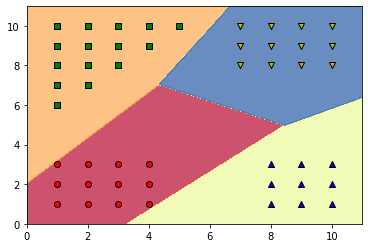

In [7]:
import matplotlib.pyplot as plt

x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array([find_multiclass_label(w, x, b) for x in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
colors = ['r', 'g', 'b', 'y', 'm', 'c']
markers = ['o', 's', '^', 'v', '*', '+']
for i, label in enumerate(np.unique(labels)):
    plt.scatter(inputs[labels == label, 0], inputs[labels == label, 1], color=colors[i], marker=markers[i], edgecolor='k')

plt.show()